In [22]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm 

## New data

In [23]:
new_data = pd.read_csv("data/data_paruvendu02.csv")
new_data

,Version,Prix,Année,Kilométrage,Energie,Emissions de CO2,Nb de portes,Puissance fiscale,Nombre de places,Couleur,...,Consommation mixte,Autres informations,Vignette CritAir,Couleur intérieur,Contrôle technique,Option/Equipement Confort intérieur,Option equipement Sécurité,Type de peinture carrosserie,Option/equipement extérieurs,Etat du véhicule
0,250h pack confort Business,34 499 €,Janvier 2022,9 000,Hybride,120.0,4 portes avec hayon,7.0,5.0,GRIS MERCURE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,250h 2WD Premium Edition MY21,34 499 €,Août 2021,9 000,Hybride,124.0,4 portes avec hayon,8.0,5.0,VERT KAKI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,250h 2WD Premium Edition MY21,35 499 €,Décembre 2021,9 000,Hybride,124.0,4 portes avec hayon,8.0,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,300h 4WD Executive Touvrant Cam360 GPS LED Sie...,40 999 €,Août 2018,6 213,Hybride,121.0,4 portes avec hayon,8.0,5.0,GRIS PLATINE METAL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,300e Luxe MY21,48 999 €,Février 2021,2 900,Electrique,NaN,4 portes avec hayon,4.0,5.0,NOIR GRAPHITE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15056,2.0L SKYACTIV-G 160 ch,26 400 €,Septembre 2017,41 000,Essence,154.0,2 portes avec hayon,9.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15057,CX-3 2.0L Skyactiv-G 120 4x2 Dynamique,14 700 €,Février 2018,52 045,Essence,137.0,4 portes avec hayon,7.0,5.0,Blanc,...,5.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15058,1.6 110CH ELEGANCE PACK,9 990 €,Juin 2002,125 882,Essence,196.0,2 portes,7.0,NaN,GRIS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15059,2021 2.0L E-SKYACTIV X 186CH BA6 SPORTINE,32 900 €,Décembre 2021,500,Hybride,NaN,4 portes avec hayon,10.0,5.0,MARRON FONCE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\namor\anaconda3\envs\intro-conda\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


<AxesSubplot:>

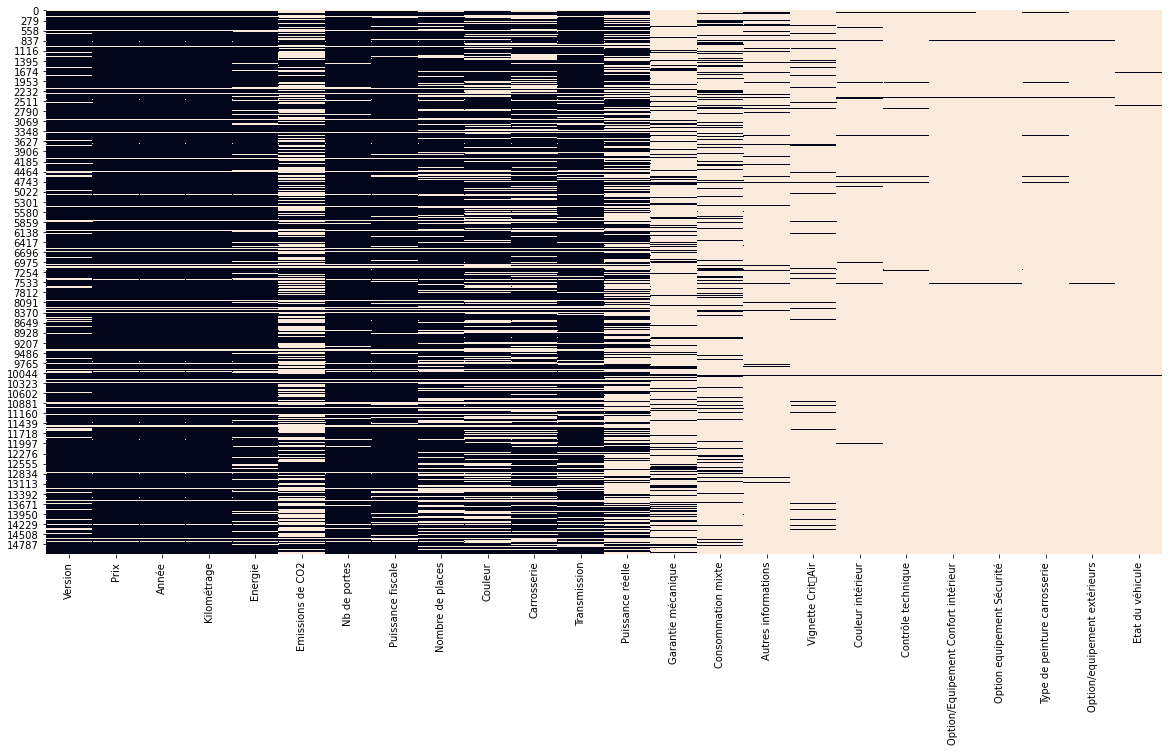

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(new_data.isna(), cbar=False)

In [25]:
(new_data.isna().sum()/new_data.shape[0]).sort_values(ascending=False)

Etat du véhicule                       0.995219
Option equipement Sécurité             0.994024
Option/Equipement Confort intérieur    0.993626
Option/equipement extérieurs           0.993626
Contrôle technique                     0.989908
Type de peinture carrosserie           0.988845
Couleur intérieur                      0.965673
Autres informations                    0.944293
Vignette CritAir                      0.936193
Consommation mixte                     0.829294
Garantie mécanique                     0.798619
Puissance réelle                       0.518359
Emissions de CO2                       0.482637
Couleur                                0.344134
Carrosserie                            0.336897
Nombre de places                       0.275413
Transmission                           0.206826
Version                                0.160348
Energie                                0.142354
Puissance fiscale                      0.140695
Nb de portes                           0

## Old data

In [26]:
data = pd.read_csv("data/paruvendu.csv")
data.head()

,location,version,price,year,mileage,fuel_type,emission,transmission,door_nb,technical_power,seat_nb,actual_power,body_colour,body_type
0,86130.0,dacia/duster,17600.0,2019.0,18300.0,essence,NaN,manuelle,4.0,7.0,5.0,130.0,blanc,4x4
1,59240.0,mini/cooper,24990.0,2018.0,47500.0,essence,119.0,automatique,2.0,10.0,4.0,192.0,rouge foncé,berline
2,53000.0,nissan/qashqai,8490.0,2013.0,166400.0,diesel,129.0,manuelle,4.0,6.0,5.0,110.0,gris,break
3,1300.0,nissan/qashqai,16900.0,2016.0,61500.0,diesel,128.0,automatique,4.0,7.0,5.0,130.0,gris foncé,4x4
4,30200.0,mini/cooper,17900.0,2018.0,58529.0,diesel,99.0,manuelle,4.0,5.0,5.0,95.0,gris,berline


In [27]:
df = data.copy()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17231 entries, 0 to 17230
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         17212 non-null  float64
 1   version          17231 non-null  object 
 2   price            17221 non-null  float64
 3   year             17212 non-null  float64
 4   mileage          17221 non-null  float64
 5   fuel_type        16163 non-null  object 
 6   emission         9957 non-null   float64
 7   transmission     12705 non-null  object 
 8   door_nb          16746 non-null  float64
 9   technical_power  16404 non-null  float64
 10  seat_nb          11688 non-null  float64
 11  actual_power     8669 non-null   float64
 12  body_colour      12343 non-null  object 
 13  body_type        14823 non-null  object 
dtypes: float64(9), object(5)
memory usage: 1.8+ MB


In [29]:
df.isna().sum()

location             19
version               0
price                10
year                 19
mileage              10
fuel_type          1068
emission           7274
transmission       4526
door_nb             485
technical_power     827
seat_nb            5543
actual_power       8562
body_colour        4888
body_type          2408
dtype: int64

In [30]:
for col in df:
    print(df[col].value_counts())

31850.0    1203
6250.0      383
51100.0     283
69150.0     206
33520.0     184
           ... 
97320.0       1
21600.0       1
44160.0       1
68520.0       1
82700.0       1
Name: location, Length: 1379, dtype: int64
citroen/ds7         233
peugeot/3008        223
bmw/serie-1         220
nissan/juke         217
opel/corsa          217
                   ... 
nissan/pulsar         1
renault/express       1
kia/pro-cee-d-ii      1
renault/r30           1
seat/alhambra         1
Name: version, Length: 224, dtype: int64
11990.0    214
19990.0    196
17990.0    181
18990.0    177
12990.0    175
          ... 
3300.0       1
34880.0      1
29489.0      1
19877.0      1
97900.0      1
Name: price, Length: 2667, dtype: int64
2018.0    2608
2021.0    2466
2019.0    2404
2020.0    1987
2017.0    1924
2016.0    1456
2015.0     979
2014.0     668
2013.0     505
2012.0     447
2022.0     385
2011.0     308
2010.0     227
2009.0     209
2008.0     148
2007.0     131
2006.0      86
2005.0      69
2

In [31]:
df['version'] = df['version'].str.replace('/', '-')

## TRAINTEST - NETTOYAGE - ENCODAGE

### Nettoyage

In [32]:
df_agg = df.groupby('version', as_index=False).median()
df_agg.head()

,version,location,price,year,mileage,emission,door_nb,technical_power,seat_nb,actual_power
0,abarth-500,63000.0,19999.0,2019.0,12932.0,155.0,2.0,8.0,4.0,165.0
1,abarth-595,31850.0,21545.0,2017.0,32300.0,139.0,2.0,10.0,4.0,180.0
2,audi-a1,38312.0,17900.0,2017.0,40000.0,104.0,4.0,5.0,5.0,95.0
3,audi-a3,56600.0,20700.0,2017.0,76730.0,114.0,4.0,7.0,5.0,140.0
4,audi-a4,38150.0,24999.0,2017.0,71231.0,132.0,4.0,8.0,5.0,150.0


In [35]:
df_agg.to_csv('data/agg_paruvendu.csv', index=False, encoding="utf-8")

In [ ]:
for name in tqdm(df_agg.version):
    for col in df.select_dtypes('float64'):
        value = df_agg[df_agg['version'] == name][col].item()
        df[col] = df[col].fillna(value)

In [ ]:
df.isna().sum()

In [ ]:
df = df.drop([15910])

In [ ]:
for col in df.select_dtypes('object'):
    df[col] = df[col].fillna(f'unknown_{col}')

In [ ]:
df.head()

### Encodage

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import joblib

In [ ]:
def building_data(df):
    ohe = OneHotEncoder(sparse=False, handle_unknown='error')
    for col in df.select_dtypes('object'):
        feature_array = ohe.fit_transform(df[[col]])
        feature_labels = ohe.categories_
        feature_labels = np.array(feature_labels).ravel()
        features = pd.DataFrame(feature_array, columns=feature_labels)
        df = pd.concat([df, features], axis=1)
        df = df.drop(columns=[col])
        df = df.dropna()
    
    # Save the encoder
    joblib.dump(ohe, 'data/encoder_joblib')
    
    df = df.sort_index(axis=1)
    
    X = df.drop('price', axis=1)
    y = df['price']
    y = y.values.reshape(y.shape[0], 1)

    print(X.shape, y.shape)
    
    return X, y

In [ ]:
X, y = building_data(df)

In [ ]:
X.head()

### Traintest

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

In [ ]:
# Save the list
joblib.dump(X_train.columns, 'data/columns_joblib')

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

### Standardiser

La phase exploratoire nous a permis d'observer une distribution normale, plus appropriée pour standardiser les données

In [ ]:
from sklearn import preprocessing

stds = preprocessing.StandardScaler()
X1_train = stds.fit_transform(X_train)

# Save the encoder
joblib.dump(stds, 'data/standardscaler_joblib')

In [ ]:
X1_train

## MODELISATION
### 1.1 Phase d'entrainement avec Scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# starting time
start = time.time()

#entrainement du modèle
lmodellineaire_std = LinearRegression()
lmodellineaire_std.fit(X1_train, y_train)

# sleeping for 1 sec to get 10 sec runtime
time.sleep(1)

# program body ends

# end time
end = time.time()
time_fit_std = end - start

# total time taken
print(f"Runtime of the program is {time_fit_std}")

## Save the model

In [ ]:
joblib.dump(lmodellineaire_std, 'data/model_joblib')

## Results

In [ ]:
print('Intercept: \n', lmodellineaire_std.intercept_)
print('Coefficients: \n', lmodellineaire_std.coef_)

In [ ]:
# Evaluation du training set
y_train_predict = lmodellineaire_std.predict(X1_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("La performance du modèle sur la base dapprentissage")
print("--------------------------------------")
print(f"L'erreur quadratique moyenne est {rmse}")
print(f"Le score R2 est {r2}")

In [ ]:
X1_train

In [ ]:
plt.scatter(X1_train[:, 3], y_train) # observer le kilométrage
plt.scatter(X1_train[:, 3], y_train_predict, c='r')

In [ ]:
X1_test = stds.transform(X_test)

In [ ]:
# model evaluation for testing set
y_test_predict = lmodellineaire_std.predict(X1_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("La performance du modèle sur la base de test")
print("--------------------------------------")
print(f"L'erreur quadratique moyenne est {rmse}")
print(f"Le score R2 est {r2}")

In [ ]:
plt.scatter(X1_test[:, 3], y_test)
plt.scatter(X1_test[:, 3], y_test_predict, c='r')

## Load models

In [ ]:
first_level = df.copy()
del first_level['price']
first_level.iloc[[0]]

### Passage between level 1 and level 2

In [ ]:
def build_data(df):
    ohe = joblib.load('data/encoder_joblib')

    for col in df.select_dtypes('object'):
        feature_array = ohe.fit_transform(df[[col]])
        feature_labels = ohe.categories_
        feature_labels = np.array(feature_labels).ravel()
        features = pd.DataFrame(feature_array, columns=feature_labels)
        df = pd.concat([df, features], axis=1)
        df = df.drop(columns=[col])
    
    return df

In [ ]:
first_level_data = build_data(first_level.iloc[[0]])
first_level_data

In [ ]:
columns_list = joblib.load('data/columns_joblib')

second_level_data = first_level_data.join(pd.DataFrame(columns=[i for i in columns_list if i not in first_level_data.columns]), how="outer")
second_level_data = second_level_data.fillna(0.0)
second_level_data = second_level_data.sort_index(axis=1)
second_level_data

### Passage between level 2 and level 3

In [ ]:
stds = joblib.load('data/standardscaler_joblib')
third_level = pd.DataFrame(stds.transform(second_level_data), columns=second_level_data.columns)
third_level

In [ ]:
# inverse_third_level = pd.DataFrame(stds.inverse_transform(third_level))
# inverse_third_level

In [ ]:
reg = joblib.load('data/model_joblib')
pred = reg.predict(third_level)
pd.DataFrame(pred, columns=['price_predicted'])

## Finally

In [ ]:
def build_data(dict):
    df = pd.DataFrame([dict])
    
    ohe = joblib.load('data/encoder_joblib')
    columns_list = joblib.load('data/columns_joblib')
    stds = joblib.load('data/standardscaler_joblib')
    reg = joblib.load('data/model_joblib')
    
    # One-Hot Encoder
    for col in df.select_dtypes('object'):
        feature_array = ohe.fit_transform(df[[col]])
        feature_labels = ohe.categories_
        feature_labels = np.array(feature_labels).ravel()
        features = pd.DataFrame(feature_array, columns=feature_labels)
        df = pd.concat([df, features], axis=1)
        df = df.drop(columns=[col])
    
    # Standardization
    df = df.join(pd.DataFrame(columns=[i for i in columns_list if i not in df.columns]), how="outer")
    df = df.fillna(0.0)
    df = df.sort_index(axis=1)
    
    # Prediction
    df = pd.DataFrame(stds.transform(df))
    pred = reg.predict(df)
    
    return int(pred[0])

In [ ]:
values = {
    'location': 75000,
    'version': 'volvo-xc90',
    'year': 2019,
    'mileage': 10000,
    'fuel_type': 'essence',
    'emission': 155.0,
    'transmission': 'manuelle',
    'door_nb': 4.0,
    'technical_power': 7.0,
    'seat_nb': 5.0,
    'actual_power': 130.0,
    'body_colour': 'noir',
    'body_type': '4x4'
}


print(f"The price predicted is {build_data(values)}€")

## FEATURE SELECTION

In [ ]:
Wait

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
selector = VarianceThreshold(0.6)
selector.fit_transform(X_train)
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:, list(cols)]
features_df_new.head()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
selector = SelectKBest(f_regression, k=2)
selector.fit_transform(X_train, y_train)
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:, list(cols)]
features_df_new.head()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=2, step=1)
selector = selector.fit(X_train, y_train)
cols = selector.get_support(indices=True)
features_df_new = X_train.iloc[:, list(cols)]
features_df_new.head()